# # Hands on Word Embedding modle

In [3]:
!pip install gdown --upgrade
file_share_link = "https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g"
file_id = file_share_link[file_share_link.find("d/")+2:file_share_link.find("/v")]
print(file_id)
!gdown "$file_id"

0B7XkCwpI5KDYNlNUTTlSS21pQmM


Downloading...
From (original): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=6e7cda62-bbe2-46e0-a9ee-9a07a4dd96a6
To: C:\Users\LENOVO\Jupyter\Untitled Folder\GoogleNews-vectors-negative300.bin.gz

  0%|          | 0.00/1.65G [00:00<?, ?B/s]
  0%|          | 524k/1.65G [00:00<09:48, 2.80MB/s]
  0%|          | 1.57M/1.65G [00:00<04:39, 5.88MB/s]
  0%|          | 3.15M/1.65G [00:00<02:54, 9.44MB/s]
  0%|          | 4.72M/1.65G [00:00<04:07, 6.63MB/s]
  1%|          | 8.91M/1.65G [00:00<02:00, 13.6MB/s]
  1%|          | 11.0M/1.65G [00:01<02:17, 11.9MB/s]
  1%|          | 12.6M/1.65G [00:01<02:17, 11.9MB/s]
  1%|          | 14.2M/1.65G [00:01<02:14, 12.1MB/s]
  1%|          | 15.7M/1.65G [00:01<02:13, 12.2MB/s]
  1%|1         | 17.3M/1.65G [00:01<02:13, 12.2MB/s]
  1%|1         | 18.9M/1.65G [00:01<02:12, 12.3MB/s]
  1%|1         | 20.4M/1.65G [00:01<02:17, 11.9MB/s]
  1%|1         

In [3]:
import gensim
model_path = r"C:\Users\LENOVO\Jupyter\Untitled Folder\GoogleNews-vectors-negative300.bin\GoogleNews-vectors-negative300.bin"
model = gensim.models.KeyedVectors.load_word2vec_format(model_path,binary = True)

In [21]:
from random import choice
vocab = list(model.key_to_index.keys()) # list of vocabulary
print(vocab[:5])

['</s>', 'in', 'for', 'that', 'is']


In [22]:
len(vocab)

3000000

In [24]:
for i in range(10):
    print(choice(vocab))

Chid
Laci_Peterson_disappearance
OSGi_bundles
Watsco_WSO_PriceWatch_Alert
Placa_Catalunya
Idled_plants
Garth_Fell
EAMCET
Guizhou_Jiangxi
Jetix_Europe


In [28]:
def check_vocab(vocab,check_words):
    print("%40s %s"%("Word","Present"))
    print("%40s %s"%("-----","------"))
    for word in check_words:
        print("%40s %s"%(word,word in model.key_to_index))
        if not word.lower() == word:
            print("%40s %s"%(word,word.lower() in model.key_to_index))

In [30]:
check_vocab(vocab,["English","Nam Cuong","kite"])

                                    Word Present
                                   ----- ------
                                 English True
                                 English True
                               Nam Cuong False
                               Nam Cuong False
                                    kite True


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
vector = model.get_vector("English")
print(vector.shape)

(300,)


In [36]:
print(f"Magnitude is a vector is {np.linalg.norm(vector)}")

Magnitude is a vector is 2.5849809646606445


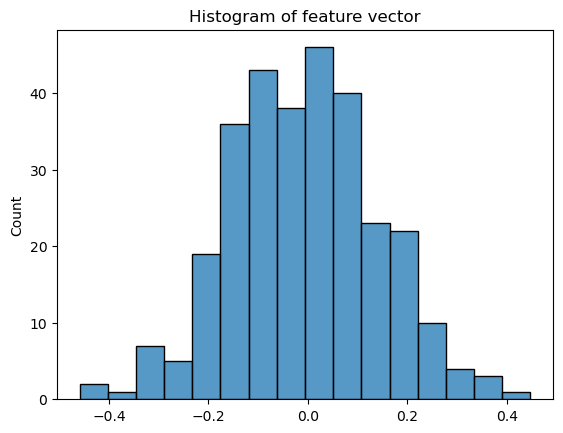

In [40]:
sns.histplot(vector, kde = False)
plt.title("Histogram of feature vector")
plt.show()

# Similarity

In [46]:
word1 = 'bread'
word2 = 'rice'
score = model.similarity(word1,word2)
print(f"cosine similarity between {word1} & {word2} is {score}")

cosine similarity between bread & rice is 0.41007423400878906


# Most similar

In [13]:
word = 'pussy'
result = model.most_similar(positive = [word,'dick'],negative = None , topn =10)

# positive: danh sách các từ mà bạn muốn tìm các từ tương tự.
# Phương thức sẽ tìm ra các từ có ngữ nghĩa gần gũi với từ hoặc cụm từ trong danh sách này.
# negative: danh sách các từ mà bạn muốn loại trừ khỏi kết quả. 
# Điều này giúp tinh chỉnh kết quả bằng cách loại bỏ các từ có ngữ nghĩa tương phản hoặc không liên quan.

print(result)

[('cunt', 0.7087982892990112), ('ass', 0.7028824090957642), ('d_*_ck', 0.6866217851638794), ('dicks', 0.6840929388999939), ('d_**_k', 0.6809003353118896), ('schlong', 0.678713858127594), ('butthole', 0.6765859127044678), ('p_*_ssy', 0.6714332103729248), ('cumming', 0.6662427186965942), ('asshole', 0.6635053157806396)]


# How to calculate the similarity score between two words

In [7]:
#cos(x,y)= x.y/mag(x)*mag(y)
matrix = model.vectors

# matrix là ma trận chứa tất cả các vector từ của mô hình. 
# Mỗi hàng trong matrix tương ứng với một vector từ cho một từ cụ thể trong từ vựng của mô hình.

print(f"shape of matrix is {matrix.shape}") 

# 3000000 là 3 triệu từ, còn 300 là thể hiện kích thước của mỗi vector từ. 
# Mỗi từ trong từ vựng được biểu diễn bởi một vector 300 chiều trong không gian nghĩa.

shape of matrix is (3000000, 300)


In [55]:
w1 = model.key_to_index['bread'] # lấy ra chỉ số hàng của từ 'bread' trong 3m từ training
w2 = model.key_to_index['butter']

v1 = matrix[w1,:]
v2 = matrix[w2,:]

# matrix[w1,:]: Truy cập vào hàng thứ w1 của matrix, tức là lấy ra toàn bộ vector từ cho "bread".
#     Dấu : được sử dụng để lấy toàn bộ các giá trị trong hàng đó

print(f"Norm of bread is {np.linalg.norm(v1)}")
print(f"Norm of butter is {np.linalg.norm(v2)}")

Norm of bread is 2.960254192352295
Norm of butter is 3.1190855503082275


In [57]:
cos_sim = (np.dot(v1,v2))/(np.linalg.norm(v1)*np.linalg.norm(v2))
print(f'cosine similarity is {cos_sim}')

cosine similarity is 0.6417260766029358


In [59]:
cos_dif = model.similarity('bread','butter')
print(cos_dif)

0.641726
